# Autoencoding

## One-hot Encoder

In [74]:
from conx import *

In [75]:
size = 5

In [76]:
net = Network("Autoencoder")
net.add(Layer("input", size, minmax=(0,1)))
net.add(Layer("hidden", 5, activation="relu", visible=True))
net.add(Layer("output", size, activation="sigmoid"))
net.config["font_family"] = "monospace"

In [77]:
net.connect()

In [78]:
net.compile(loss='binary_crossentropy', optimizer="adam")

<IPython.core.display.Javascript object>

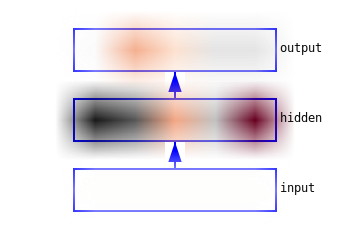

In [79]:
net

In [80]:
patterns = [one_hot(i, size) for i in range(size)]

In [81]:
patterns[0]

[1.0, 0.0, 0.0, 0.0, 0.0]

In [82]:
dataset = [(p,p) for p in patterns]

<IPython.core.display.Javascript object>

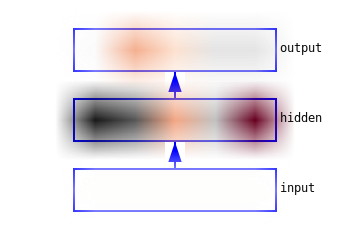

In [83]:
net

In [84]:
import time
for i in range(size):
    net.propagate(dataset[i][0])
    time.sleep(1)

In [85]:
dataset[0]

([1.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0])

In [86]:
net.set_dataset(dataset)

Split dataset into:
   train set count: 5
   test set count : 0
Input Summary:
   count  : 5
   shape  : (5,)
   range  : (0.0, 1.0)
Target Summary:
   count  : 5
   shape  : (5,)
   range  : (0.0, 1.0)


In [87]:
net.train(accuracy=1, epochs=10000, report_rate=200, tolerance=0.4)

Training...
Epoch #  200 | train error 0.49834 | train accuracy 0.84000 | validate% 0.00000
Epoch #  400 | train error 0.35801 | train accuracy 0.88000 | validate% 0.40000
Epoch #  600 | train error 0.24626 | train accuracy 0.92000 | validate% 0.40000
Epoch #  800 | train error 0.15936 | train accuracy 1.00000 | validate% 0.80000
Epoch #  812 | train error 0.15499 | train accuracy 1.00000 | validate% 1.00000


In [88]:
net.propagate(dataset[0][0])

[0.60035396, 0.029713737, 0.23017949, 0.019070603, 0.14127612]

<IPython.core.display.Javascript object>

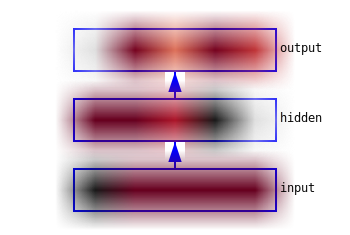

In [89]:
net

In [91]:
for i in range(size):
    net.propagate(dataset[i][0])
    time.sleep(1)

In [92]:
net.test()

Testing on training dataset...
# | inputs | targets | outputs | result
---------------------------------------
0 | [1.0, 0.0, 0.0, 0.0, 0.0] | [1.0, 0.0, 0.0, 0.0, 0.0] | [0.6, 0.0, 0.2, 0.0, 0.1] | X
1 | [0.0, 1.0, 0.0, 0.0, 0.0] | [0.0, 1.0, 0.0, 0.0, 0.0] | [0.1, 0.8, 0.1, 0.0, 0.1] | X
2 | [0.0, 0.0, 1.0, 0.0, 0.0] | [0.0, 0.0, 1.0, 0.0, 0.0] | [0.1, 0.0, 0.7, 0.1, 0.1] | X
3 | [0.0, 0.0, 0.0, 1.0, 0.0] | [0.0, 0.0, 0.0, 1.0, 0.0] | [0.1, 0.0, 0.1, 0.9, 0.1] | X
4 | [0.0, 0.0, 0.0, 0.0, 1.0] | [0.0, 0.0, 0.0, 0.0, 1.0] | [0.3, 0.2, 0.0, 0.0, 0.6] | X
Total count: 5
Total percentage correct: 0.0


## MNIST Autoencoding

In [160]:
net = Network("MNIST-Autoencoder")

In [161]:
net.load_mnist_dataset()

Input Summary:
   count  : 70000
   shape  : (28, 28, 1)
   range  : (0.0, 1.0)
Target Summary:
   count  : 70000
   shape  : (10,)
   range  : (0.0, 1.0)


In [162]:
28 * 28

784

In [165]:
net.add(Layer("input", (28,28,1)))
net.add(FlattenLayer("flatten"))
net.add(Layer("hidden1", 25, activation="relu"))
net.add(Layer("hidden2", 25, activation="relu"))
net.add(Layer("hidden3", 25, activation="relu"))
net.add(Layer("output", 10, vshape=(28,28), activation="sigmoid"))

In [166]:
net.connect()
net.compile(loss="binary_crossentropy", optimizer="adam")

<IPython.core.display.Javascript object>

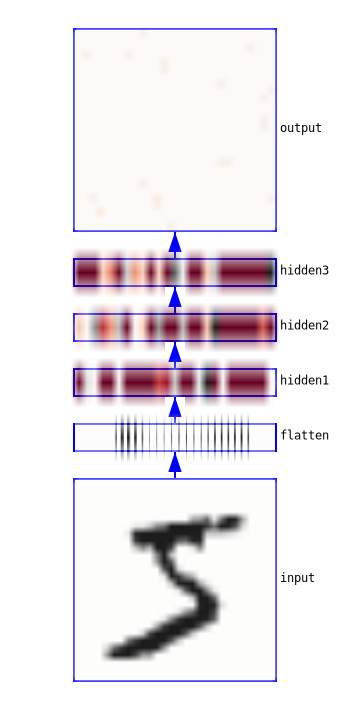

In [167]:
net

In [168]:
import numpy as np

In [169]:
image = np.random.rand(28,28,1)

In [170]:
output = net.propagate(image)

In [173]:
net.slice_dataset(100)

Slicing dataset 0:100...
Input Summary:
   count  : 100
   shape  : (28, 28, 1)
   range  : (0.0, 1.0)
Target Summary:
   count  : 100
   shape  : (10,)
   range  : (0.0, 1.0)


In [174]:
net.train(accuracy=0.5, epochs=1000, report_rate=1)

Training...


ValueError: Error when checking target: expected output to have shape (None, 784) but got array with shape (100, 10)

In [29]:
import time
for i in range(20):
    net.propagate(net.get_input(i))
    time.sleep(1)